In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
listings = pd.read_csv("OneDrive - Chevron/Desktop/Data Science/Udacity/Boston Airbnb/listings.csv")
calendar = pd.read_csv("OneDrive - Chevron/Desktop/Data Science/Udacity/Boston Airbnb/calendar.csv")
reviews = pd.read_csv("OneDrive - Chevron/Desktop/Data Science/Udacity/Boston Airbnb/reviews.csv")

In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [5]:
calendar_c = calendar.dropna()

In [6]:
calendar_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  643037 non-null  int64 
 1   date        643037 non-null  object
 2   available   643037 non-null  object
 3   price       643037 non-null  object
dtypes: int64(1), object(3)
memory usage: 24.5+ MB


In [7]:
calendar_c['price'] = calendar_c['price'].replace('[\$,]', '', regex=True).astype(float).astype('int64')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\gixj\AppData\Local\Temp\ipykernel_10816\185889605.py:1: SyntaxWarning: invalid escape sequence '\$'
  calendar_c['price'] = calendar_c['price'].replace('[\$,]', '', regex=True).astype(float).astype('int64')
C:\Users\gixj\AppData\Local\Temp\ipykernel_10816\185889605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_c['price'] = calendar_c['price'].replace('[\$,]', '', regex=True).astype(float).astype('int64')


In [8]:
calendar_c['date'] = pd.to_datetime(calendar_c['date'])

C:\Users\gixj\AppData\Local\Temp\ipykernel_10816\1043468810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_c['date'] = pd.to_datetime(calendar_c['date'])


In [9]:
calendar_c['month'] = calendar_c['date'].dt.month

C:\Users\gixj\AppData\Local\Temp\ipykernel_10816\1204197662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_c['month'] = calendar_c['date'].dt.month


In [10]:
avg_price_month = calendar_c.groupby('month')['price'].mean()

In [11]:
print(avg_price_month.sort_values(ascending=False))

month
9     237.047727
10    233.416248
8     203.330142
11    202.924416
7     202.486309
4     197.252890
6     196.535302
5     193.712295
12    192.601915
1     182.799671
3     181.818742
2     180.961028
Name: price, dtype: float64


<Axes: xlabel='month'>

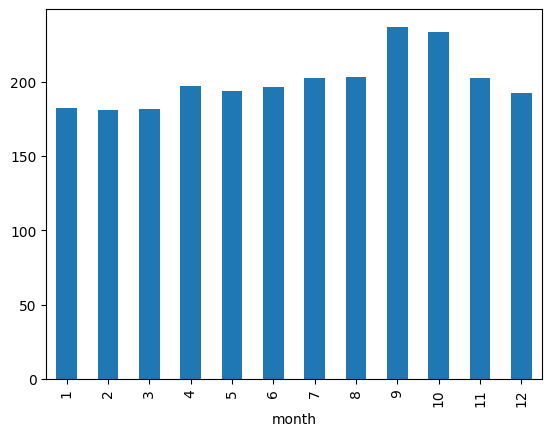

In [12]:
avg_price_month.plot(x='month', y = 'price', kind = 'bar')

In [13]:
calendar_c['day_of_week'] = calendar_c['date'].dt.day_name()

C:\Users\gixj\AppData\Local\Temp\ipykernel_10816\296138024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_c['day_of_week'] = calendar_c['date'].dt.day_name()


In [14]:
avg_price_day_of_week = calendar_c.groupby('day_of_week')['price'].mean()

In [15]:
avg_price_day_of_week.sort_values(ascending = False)

day_of_week
Saturday     203.408387
Friday       203.121167
Sunday       198.219764
Thursday     198.073112
Monday       195.809561
Wednesday    195.418228
Tuesday      195.173842
Name: price, dtype: float64

Text(0.5, 0, 'Day of the week')

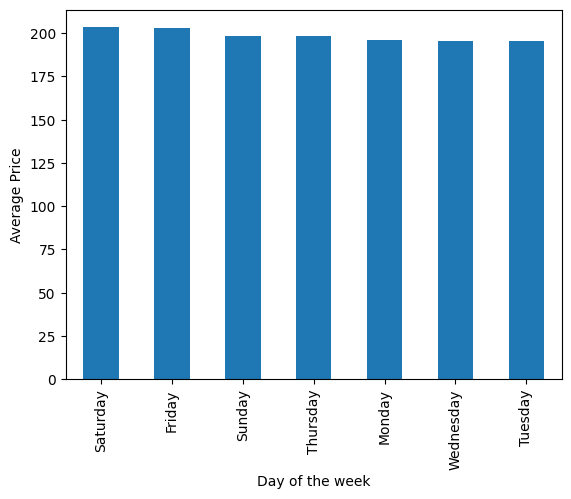

In [16]:
ax = avg_price_day_of_week.sort_values(ascending = False).plot(x='day_of_week', y = 'price', kind = 'bar')
ax.set_ylabel ('Average Price')
ax.set_xlabel('Day of the week')

In [ ]:
#Best listings (reviews higher or equals to 90)

In [17]:
best = listings[listings['review_scores_rating'] >= 90]

In [18]:
listings.shape

(3585, 95)

In [19]:
best.shape

(2052, 95)

In [20]:
best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2052 entries, 1 to 3583
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                2052 non-null   int64  
 1   listing_url                       2052 non-null   object 
 2   scrape_id                         2052 non-null   int64  
 3   last_scraped                      2052 non-null   object 
 4   name                              2052 non-null   object 
 5   summary                           1974 non-null   object 
 6   space                             1580 non-null   object 
 7   description                       2052 non-null   object 
 8   experiences_offered               2052 non-null   object 
 9   neighborhood_overview             1400 non-null   object 
 10  notes                             1071 non-null   object 
 11  transit                           1458 non-null   object 
 12  access     

In [21]:
best['price'] = best['price'].replace('[\$,]', '', regex=True).astype(float).astype('int64')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\gixj\AppData\Local\Temp\ipykernel_10816\1719907004.py:1: SyntaxWarning: invalid escape sequence '\$'
  best['price'] = best['price'].replace('[\$,]', '', regex=True).astype(float).astype('int64')
C:\Users\gixj\AppData\Local\Temp\ipykernel_10816\1719907004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best['price'] = best['price'].replace('[\$,]', '', regex=True).astype(float).astype('int64')


In [22]:
best.groupby('property_type').agg({'price': ['mean', 'count']}).sort_values(by=('price', 'mean'), ascending=False)

price      
                       mean count
property_type                    
Guesthouse       289.000000     1
Boat             287.625000     8
Other            220.500000     6
Loft             200.466667    30
Condominium      184.771242   153
Apartment        177.943820  1424
Townhouse        155.750000    40
Villa            140.000000     2
House            137.416438   365
Bed & Breakfast  110.619048    21
Entire Floor      80.000000     1
Dorm              50.000000     1

In [69]:
best.groupby('property_type')['price'].mean().sort_values(ascending = False)

property_type
Guesthouse         289.000000
Boat               287.625000
Other              220.500000
Loft               200.466667
Condominium        184.771242
Apartment          177.943820
Townhouse          155.750000
Villa              140.000000
House              137.416438
Bed & Breakfast    110.619048
Entire Floor        80.000000
Dorm                50.000000
Name: price, dtype: float64

In [70]:
best['property_type'].value_counts()

property_type
Apartment          1424
House               365
Condominium         153
Townhouse            40
Loft                 30
Bed & Breakfast      21
Boat                  8
Other                 6
Villa                 2
Guesthouse            1
Dorm                  1
Entire Floor          1
Name: count, dtype: int64

C:\Users\gixj\AppData\Local\Temp\ipykernel_10816\1080740098.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(grouped_data.index, rotation=90)


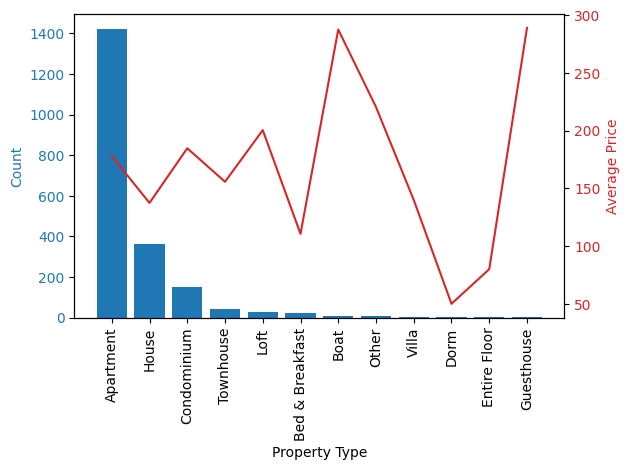

In [23]:
grouped_data = best.groupby('property_type').agg({'id':'count', 'price':'mean'}).rename(columns={'id':'count'})

# Sort the data by count in descending order for better visualization
grouped_data = grouped_data.sort_values('count', ascending=False)

# Create a bar chart
fig, ax1 = plt.subplots()

# Plot the counts of property_type
color = 'tab:blue'
ax1.set_xlabel('Property Type')
ax1.set_ylabel('Count', color=color)
ax1.bar(grouped_data.index, grouped_data['count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Second y-axis for mean price
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Average Price', color=color)
ax2.plot(grouped_data.index, grouped_data['price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
# Tilt the property type names on x-axis by 90 degrees
ax1.set_xticklabels(grouped_data.index, rotation=90)

# Show the plot
fig.tight_layout()
plt.show()

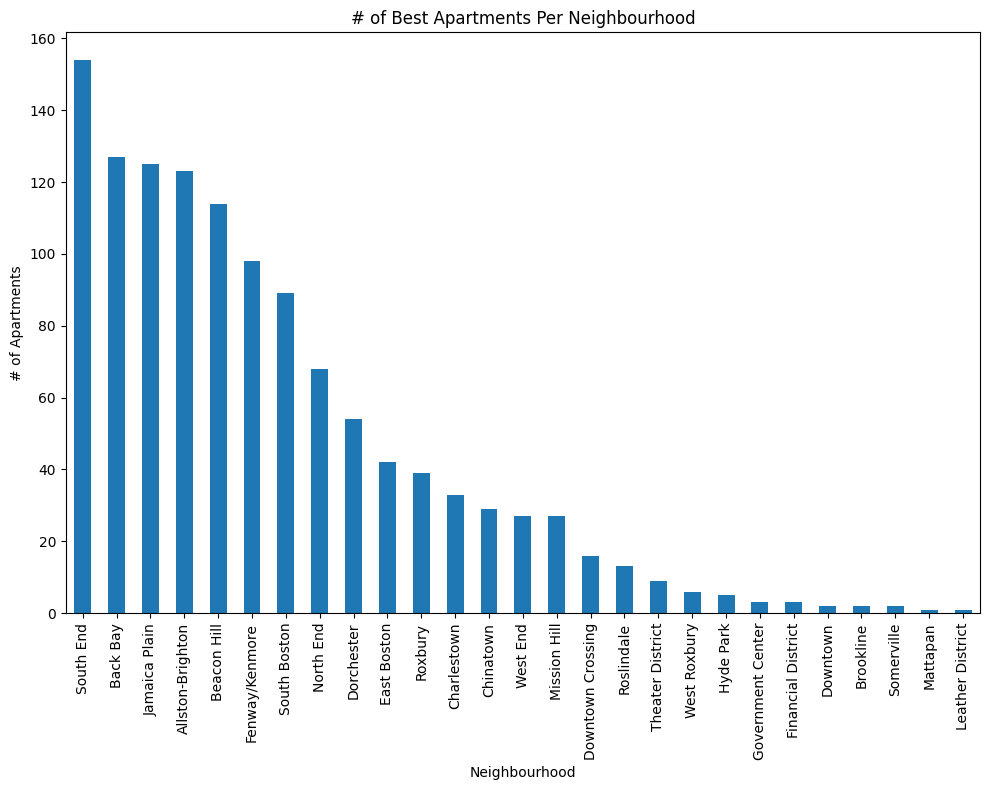

In [24]:
# Filter the data for 'apartment' property_type
apartment_data = best[best['property_type'] == 'Apartment']

# Group the filtered data by 'neighborhood' and count the occurrences
neighborhood_counts = apartment_data['neighbourhood'].value_counts()
# Calculate the mean price for 'apartment' in each neighborhood
mean_price = apartment_data.groupby('neighbourhood')['price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 8))
neighborhood_counts.plot(kind='bar')

plt.title('# of Best Apartments Per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('# of Apartments')
plt.xticks(rotation=90)  # Rotate the neighborhood names on x-axis by 90 degrees
plt.tight_layout()
plt.show()

C:\Users\gixj\AppData\Local\Temp\ipykernel_10816\1091190155.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(average_prices.index, rotation=90)


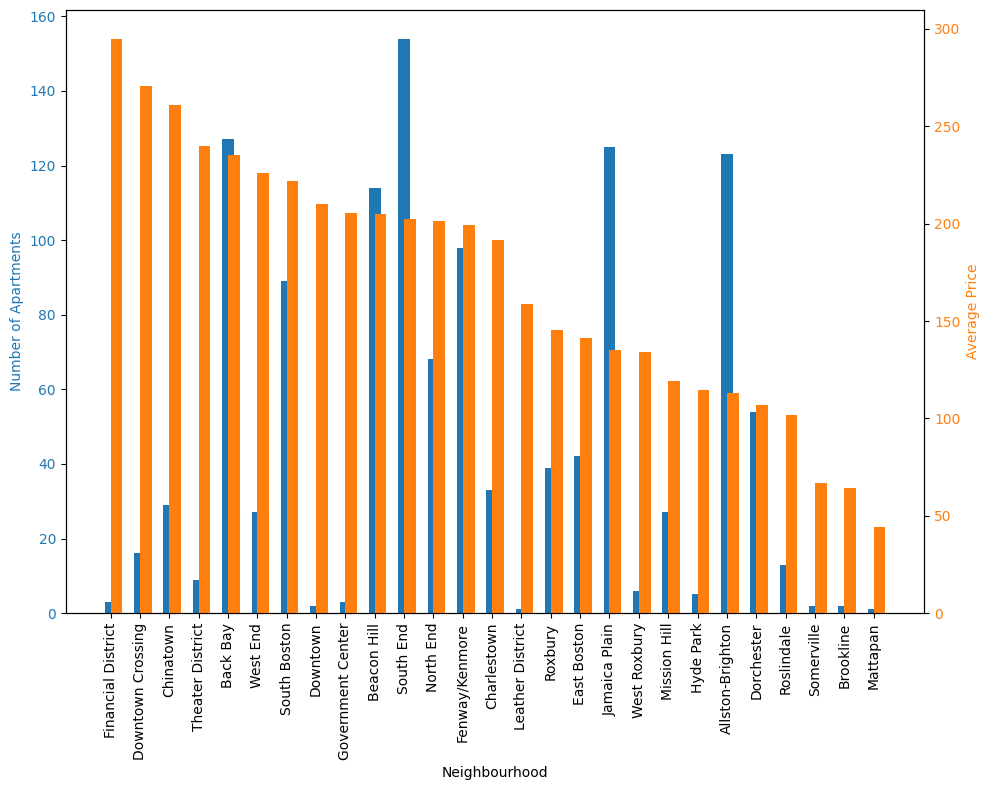

In [25]:
# First, we'll calculate the number of apartments per neighborhood
apartment_counts = apartment_data['neighbourhood'].value_counts()

# Next, we'll calculate the average price per neighborhood
average_prices = apartment_data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Now, we'll create a bar chart with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 8))  # Increased figure size for better distinction

# Bar chart for the number of apartments
color = 'tab:blue'
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Number of Apartments', color=color)
ax1.bar(average_prices.index, apartment_counts.reindex(average_prices.index).values, color=color, width=0.4, align='center')
ax1.tick_params(axis='y', labelcolor=color)

# Rotate x-axis labels by 90 degrees
ax1.set_xticklabels(average_prices.index, rotation=90)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# Bar chart for the average price
color = 'tab:orange'  # Changed color to orange
ax2.set_ylabel('Average Price', color=color)
ax2.bar(average_prices.index, average_prices.values, color=color, width=0.4, align='edge')
ax2.tick_params(axis='y', labelcolor=color)

# Otherwise the right y-label is slightly clipped
fig.tight_layout()  

# Show the plot
plt.show()

In [27]:
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float).astype('int64')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\gixj\AppData\Local\Temp\ipykernel_10816\4232420946.py:1: SyntaxWarning: invalid escape sequence '\$'
  listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float).astype('int64')


In [28]:
listings = listings.dropna(subset=['property_type', 'room_type','bathrooms', 'bedrooms'])

In [31]:

# Selecting the features and target variable
X = listings[['bedrooms', 'bathrooms', 'property_type', 'room_type']]
y = listings['price']

# One-hot encoding the categorical variables
categorical_features = ['property_type', 'room_type']
one_hot_encoder = OneHotEncoder()

# Using ColumnTransformer to apply the encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)],
    remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, y_train)

# Making predictions
y_pred = lr.predict(X_test)

# Calculating the Mean Squared Error
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_pred), len(y_test))


'The r-squared score for the model was 0.4216846413759009 on 712 values.'